In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425
from scipy.stats import norm,gamma,chi2, expon, uniform, t

from scipy.special import expit

In [2]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/annual-pm25-emissions-from-wildfires.csv')
df.head()

,Entity,Code,Year,Annual PM2.5 emissions from wildfires
0,Afghanistan,AFG,2003,2038.63000
1,Afghanistan,AFG,2004,1456.13000
2,Afghanistan,AFG,2005,941.55005
3,Afghanistan,AFG,2006,1482.52000
4,Afghanistan,AFG,2007,1731.14000


In [3]:
# Pivot the DataFrame to reshape it
pivot_df = df.pivot_table(index=['Entity', 'Code'], columns='Year', values='Annual PM2.5 emissions from wildfires').reset_index()

# Rounding off the emission values to two digits after the decimal point
pivot_df = pivot_df.round(2)

# Renaming the columns for better readability
pivot_df.columns.name = None  # Removing the name of the columns index
#pivot_df.columns = pivot_df.columns.astype(str)  # Converting column names to string
pivot_df = pivot_df.rename(columns={'Entity': 'Entity', 'Code': 'Code'})  # Renaming Entity and Code columns


#print(pivot_df)
pivot_df

,Entity,Code,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,2038.63,1456.13,941.55,1482.52,1731.14,1923.95,984.88,2531.51,...,564.38,1086.25,1151.70,559.56,535.84,1216.05,931.96,194.70,334.34,288.41
1,Akrotiri and Dhekelia,OWID_AKD,0.00,0.00,2.53,25.93,6.85,0.00,16.02,0.00,...,2.24,0.00,21.22,4.98,0.00,0.00,0.00,5.38,3.21,0.00
2,Aland Islands,ALA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,80.08,0.00,0.00,0.00,0.00,0.00,0.00
3,Albania,ALB,1201.66,154.20,362.47,182.07,13199.92,936.52,466.67,360.66,...,526.78,322.85,2848.14,465.41,705.67,662.47,1985.61,872.18,533.62,71.53
4,Algeria,DZA,30412.79,24027.08,24610.26,30180.19,51202.78,30278.46,25380.48,22058.59,...,15820.26,19962.53,31545.44,7632.69,14110.65,32359.23,24412.57,17523.28,15766.54,689.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Western Sahara,ESH,0.00,0.00,0.00,4.66,26.68,10.35,1.77,0.00,...,0.00,0.00,2.62,9.11,3.47,9.29,0.00,2.53,17.71,2.68
248,World,OWID_WRL,36573976.00,31335194.00,30569386.00,29467762.00,30385412.00,28017734.00,25458000.00,26923142.00,...,32485882.00,27203052.00,24116622.00,23129380.00,27625462.00,22829404.00,27183314.00,20312744.00,32505928.00,4177714.50
249,Yemen,YEM,932.94,466.15,814.50,1890.00,2400.39,1754.46,1674.50,1961.81,...,332.74,385.83,29681.67,22611.77,23242.24,27749.15,24191.22,14659.03,23197.48,241.11
250,Zambia,ZMB,725473.30,676927.80,734942.90,663351.90,731718.94,780590.40,645760.40,749877.06,...,765199.80,735813.40,571919.06,580936.30,568178.50,448376.80,524326.20,582712.70,481626.75,3097.32


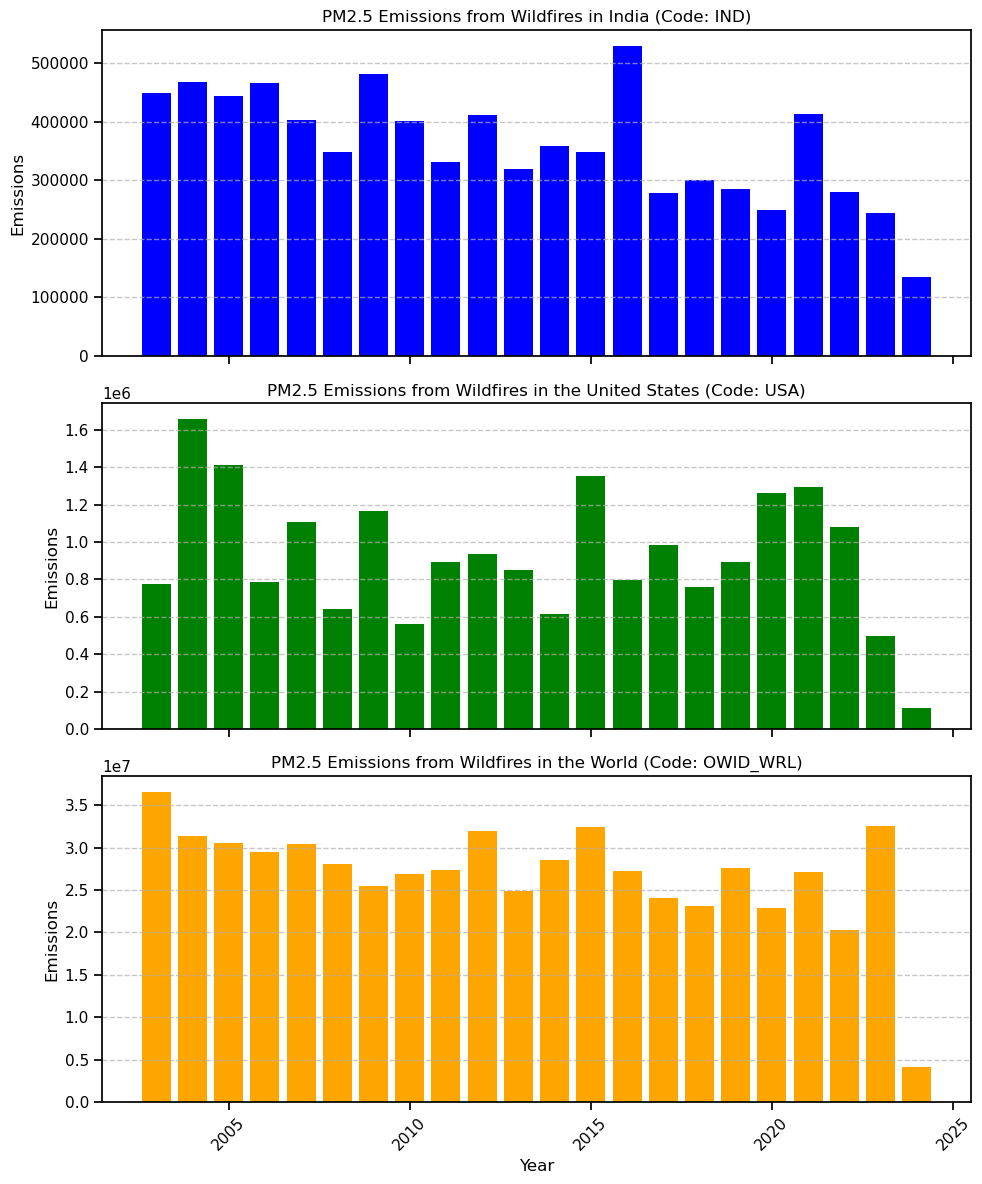

In [7]:
import matplotlib.pyplot as plt

# Filter the DataFrame for India with code 'IND'
india_df = pivot_df[(pivot_df['Entity'] == 'India') & (pivot_df['Code'] == 'IND')]

# Filter the DataFrame for United States with code 'USA'
usa_df = pivot_df[(pivot_df['Entity'] == 'United States') & (pivot_df['Code'] == 'USA')]

# Filter the DataFrame for World with code 'OWID_WRL'
world_df = pivot_df[(pivot_df['Entity'] == 'World') & (pivot_df['Code'] == 'OWID_WRL')]

# Drop 'Entity' and 'Code' columns as they are no longer needed for plotting
india_df = india_df.drop(['Entity', 'Code'], axis=1)
usa_df = usa_df.drop(['Entity', 'Code'], axis=1)
world_df = world_df.drop(['Entity', 'Code'], axis=1)

# Transpose the DataFrames to have years as rows and emissions as columns
india_df = india_df.T
usa_df = usa_df.T
world_df = world_df.T

# Plotting the histograms for India, the United States, and the World
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot for India
axes[0].bar(india_df.index, india_df.values.flatten(), color='blue')
axes[0].set_ylabel('Emissions')
axes[0].set_title('PM2.5 Emissions from Wildfires in India (Code: IND)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for the United States
axes[1].bar(usa_df.index, usa_df.values.flatten(), color='green')
axes[1].set_ylabel('Emissions')
axes[1].set_title('PM2.5 Emissions from Wildfires in the United States (Code: USA)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for the World
axes[2].bar(world_df.index, world_df.values.flatten(), color='orange')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Emissions')
axes[2].set_title('PM2.5 Emissions from Wildfires in the World (Code: OWID_WRL)')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


0.016807648882257206 37.93868444744855
112255.35 1658111.8


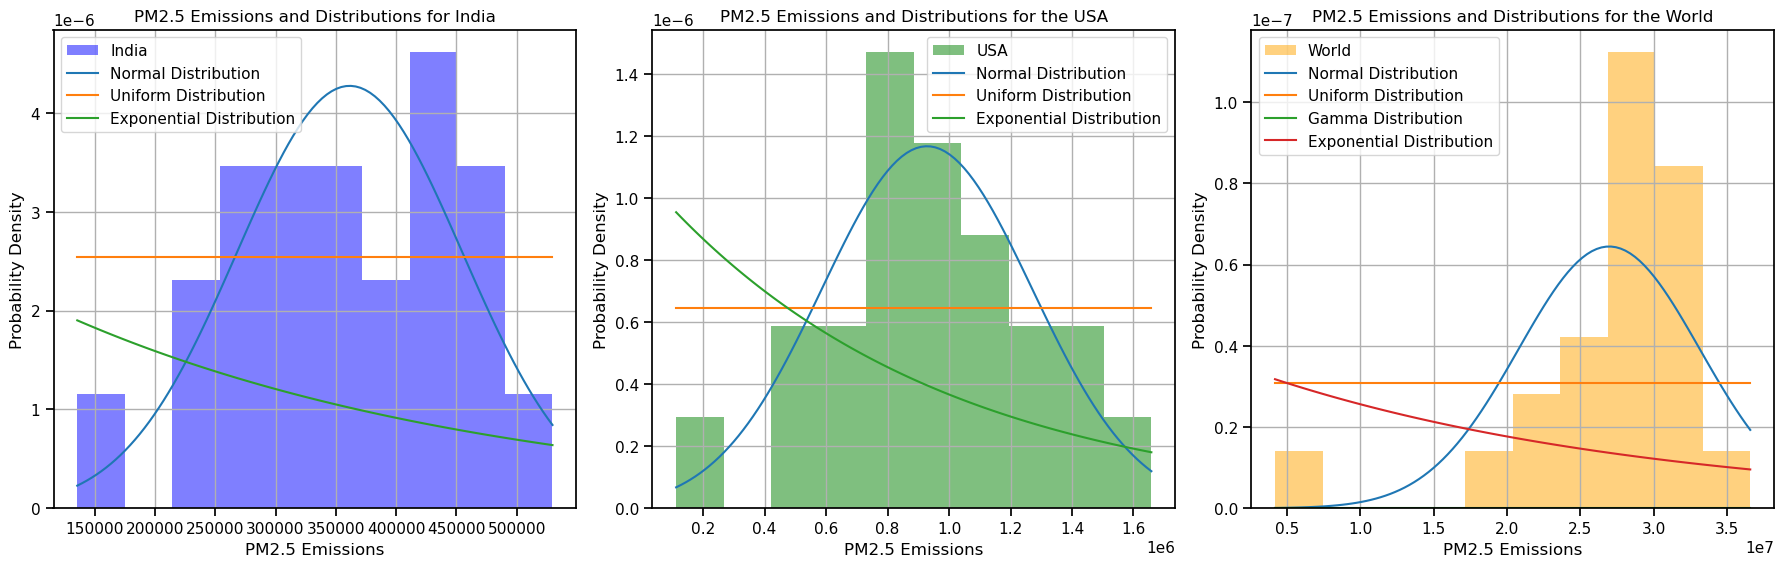

In [17]:
import numpy as np
from scipy.stats import norm, uniform, expon

# Calculate mean and standard deviation for PM2.5 emissions for India and the USA
pm25_emissions_values_india = india_df.values.flatten()
pm25_emissions_mean_india = pm25_emissions_values_india.mean()
pm25_emissions_std_india = pm25_emissions_values_india.std()

pm25_emissions_values_usa = usa_df.values.flatten()
pm25_emissions_mean_usa = pm25_emissions_values_usa.mean()
pm25_emissions_std_usa = pm25_emissions_values_usa.std()

# Generate data for the normal distribution curve for India
x_india = np.linspace(min(pm25_emissions_values_india), max(pm25_emissions_values_india), 100)
y_normal_india = norm.pdf(x_india, pm25_emissions_mean_india, pm25_emissions_std_india)
y_uniform_india = uniform.pdf(x_india, loc=min(pm25_emissions_values_india), scale=max(pm25_emissions_values_india)-min(pm25_emissions_values_india))
y_exponential_india = expon.pdf(x_india, scale=pm25_emissions_mean_india)

# Generate data for the normal distribution curve for the USA
x_usa = np.linspace(min(pm25_emissions_values_usa), max(pm25_emissions_values_usa), 100)
y_normal_usa = norm.pdf(x_usa, pm25_emissions_mean_usa, pm25_emissions_std_usa)
y_uniform_usa = uniform.pdf(x_usa, loc=min(pm25_emissions_values_usa), scale=max(pm25_emissions_values_usa)-min(pm25_emissions_values_usa))
y_exponential_usa = expon.pdf(x_usa, scale=pm25_emissions_mean_usa)

# Calculate mean and standard deviation for PM2.5 emissions for the World
pm25_emissions_values_world = world_df.values.flatten()
pm25_emissions_mean_world = pm25_emissions_values_world.mean()
pm25_emissions_std_world = pm25_emissions_values_world.std()

#pm25_emissions_world_alpha_mom = pm25_emissions_mean_world ** 2 / pm25_emissions_std_world
#pm25_emissions_world_beta_mom = pm25_emissions_std_world / pm25_emissions_mean_world

# Calculate shape and scale parameters for the gamma distribution for the World
pm25_emissions_world_alpha, _, pm25_emissions_world_beta = gamma.fit(pm25_emissions_values_world)

print(pm25_emissions_world_alpha, pm25_emissions_world_beta)

# Generate data for the normal distribution curve for the World
x_world = np.linspace(min(pm25_emissions_values_world), max(pm25_emissions_values_world), 100)
y_normal_world = norm.pdf(x_world, pm25_emissions_mean_world, pm25_emissions_std_world)
y_uniform_world = uniform.pdf(x_world, loc=min(pm25_emissions_values_world), scale=max(pm25_emissions_values_world)-min(pm25_emissions_values_world))
y_exponential_world = expon.pdf(x_world, scale=pm25_emissions_mean_world)
y_gamma_world = gamma.pdf(x_world, a=pm25_emissions_world_alpha, scale=pm25_emissions_world_beta)

# Plotting the histograms and distributions for India, the USA, and the World
plt.figure(figsize=(18, 6))

# Plot histogram and distributions for India
plt.subplot(1, 3, 1)
plt.hist(pm25_emissions_values_india, bins=10, density=True, color='blue', alpha=0.5, label='India')
plt.plot(x_india, y_normal_india, label='Normal Distribution')
plt.plot(x_india, y_uniform_india, label='Uniform Distribution')
plt.plot(x_india, y_exponential_india, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for India')
plt.xlabel('PM2.5 Emissions')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Plot histogram and distributions for the USA
plt.subplot(1, 3, 2)
plt.hist(pm25_emissions_values_usa, bins=10, density=True, color='green', alpha=0.5, label='USA')
plt.plot(x_usa, y_normal_usa, label='Normal Distribution')
plt.plot(x_usa, y_uniform_usa, label='Uniform Distribution')
plt.plot(x_usa, y_exponential_usa, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for the USA')
plt.xlabel('PM2.5 Emissions')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
#print(min(x_usa), max(x_usa))

# Plot histogram and distributions for the World
plt.subplot(1, 3, 3)
plt.hist(pm25_emissions_values_world, bins=10, density=True, color='orange', alpha=0.5, label='World')
plt.plot(x_world, y_normal_world, label='Normal Distribution')
plt.plot(x_world, y_uniform_world, label='Uniform Distribution')
plt.plot(x_world, y_gamma_world, label='Gamma Distribution')
plt.plot(x_world, y_exponential_world, label='Exponential Distribution')
plt.title('PM2.5 Emissions and Distributions for the World')
plt.xlabel('PM2.5 Emissions')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Bayesian simulation

Bayesian estimation: Let's pick pdfs for the  𝛾
  distribution's parameters  𝛼
  and  𝛽
 .

## Modeling Gamma parameters with a Uniform distribution

Start with the `Uniform` distribution. datagiven seems to go from 15 to 55 units, so let's pick the Uniform distribution to model the $\alpha$ parameter for our gamma function. The Uniform distribution also needs start and end parameters. We pick them to be wide enough to match the data. Then we model data with the Gamme distribution.

## Modeling Gamma parameters with a Uniform distribution

Start with the `Uniform` distribution. datagiven seems to go from 15 to 55 units, so let's pick the Uniform distribution to model the $\alpha$ parameter for our gamma function. The Uniform distribution also needs start and end parameters. We pick them to be wide enough to match the data. Then we model data with the Gamme distribution.

In [18]:
from pymc3 import Model, Uniform

with Model() as bmi:
    ualpha = Uniform('ualpha', lower=min(x_usa)*0.75, upper=max(x_usa)*1.5)
    ubeta = Uniform('ubeta', lower=min(x_usa)*0.75, upper=max(x_usa)*1.5)

In [20]:
from pymc3 import Gamma
with bmi:
    medical = Gamma('medical', alpha=ualpha, beta=ubeta, observed=pm25_emissions_values_usa)

In [21]:
from pymc3 import fit

with bmi: 
    bmi_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 4.5157e+12


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/saipranath/anaconda3/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


AttributeError: Line2D.set() got an unexpected keyword argument 'varnames'

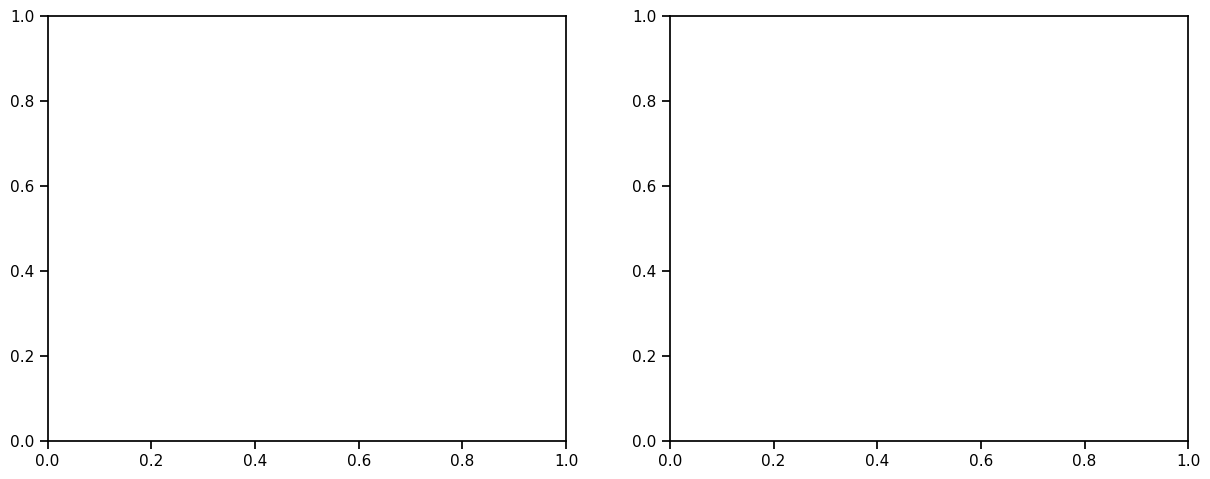

In [23]:
from pymc3 import plot_posterior

plot_posterior(bmi_trace[100:], 
                varnames=['ualpha', 'ubeta'],
                color='#87ceeb');

In [24]:
bmi_trace['ualpha'].mean(), bmi_trace['ubeta'].mean()

(2366834.232710987, 200869.14565761285)

In [25]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = bmi_trace['ualpha'].mean()
ubeta_posterior_mean = bmi_trace['ubeta'].mean()

pm25_emissions_values_usa.hist(density=True, bins=20)
plt.plot(np.linspace(0, 100), gamma.pdf(np.linspace(0, 100), ualpha_posterior_mean, ubeta_posterior_mean))

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

In [26]:
bmi_mean = pm25_emissions_values_usa.mean()
bmi_var = pm25_emissions_values_usa.var()
alpha_mom = (bmi_mean ** 2) / bmi_var
beta_mom = bmi_var / bmi_mean
bmi_mean, bmi_var, alpha_mom, beta_mom

(928347.8663636367, 116804616192.69824, 7.378387850357851, 125819.87897513573)

In [27]:
from pymc3 import Model, Uniform, Normal

with Model() as bmi_model_normal:
    nalpha = Normal('nalpha', mu=alpha_mom, sd=10)
    nbeta = Normal('nbeta', mu=beta_mom, sd=10)

In [29]:
from pymc3 import Gamma
with bmi_model_normal:
    cas = Gamma('cas', alpha=nalpha, beta=nbeta, observed=pm25_emissions_values_usa)

In [30]:
from pymc3 import fit

with bmi_model_normal: 
    bmi_trace_normal = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 2.5696e+12


In [32]:
max(pm25_emissions_values_usa)

1658111.8

/var/folders/8h/lyhtt3mn2sg7w7mc0dny8v5h0000gn/T/ipykernel_14669/2727026034.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Exponential.dist(1/300000).random(size=10000), kde=False)


<Axes: >

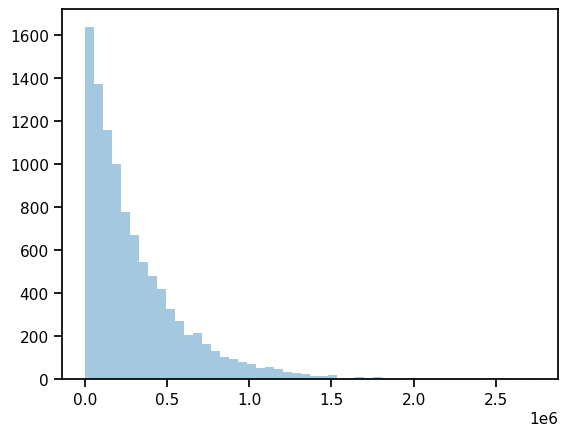

In [40]:
from pymc3 import Exponential
sns.distplot(Exponential.dist(1/300000).random(size=10000), kde=False)

In [41]:
from pymc3 import Model, Exponential

with Model() as bmi_exponential:
    ealpha = Exponential('ealpha', 1/300000)
    ebeta = Exponential('ebeta', 1/300000)

In [42]:
from pymc3 import Gamma
with bmi_exponential:
    medical = Gamma('medical', alpha=ealpha, beta=ebeta, observed=pm25_emissions_values_usa)

In [43]:
from pymc3 import fit

with bmi_exponential: 
    bmi_trace_exponential = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 2.9481e+11


In [44]:
bmi_trace_exponential['ealpha'].mean(), bmi_trace_exponential['ebeta'].mean()

(7386870.866210544, 12241.879817271236)

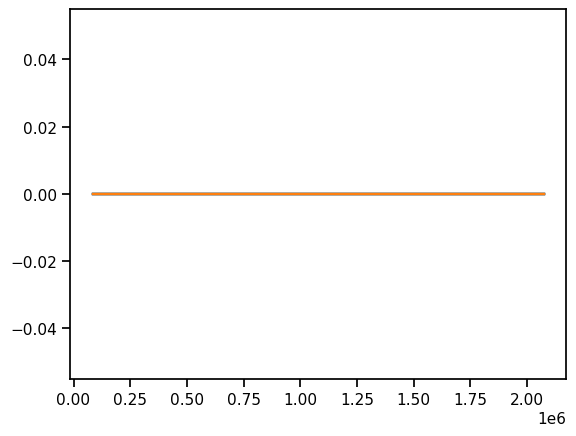

In [47]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = bmi_trace_exponential['ealpha'].mean()
ebeta_posterior_mean = bmi_trace_exponential['ebeta'].mean()

#pm25_emissions_values_usa.hist(density=True, bins=10)
plt.plot(np.linspace(min(pm25_emissions_values_usa)*0.75, max(pm25_emissions_values_usa)*1.25), gamma.pdf(np.linspace(min(pm25_emissions_values_usa)*0.75, (pm25_emissions_values_usa)*1.25), ealpha_posterior_mean, ebeta_posterior_mean))
#plt.plot(np.linspace(10, 60), gamma.pdf(np.linspace(10, 60), alpha_mom, scale=beta_mom), 'r-')

Bayesian Simulation haven't worked as expected need to check the MOM, MLE and other Models.